In [1]:
from wraptrain import ReadImage,OriginModNetDataLoader,ImageMatteLoader,ModNetImageGenerator,NetTrainer
base_path = "/mnt/data/Train/"
fg = base_path+"FG"
matte= base_path+"Alpha"
files = ReadImage(fg,matte).read_same_names()

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-02 14:20:17.407640: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 14:20:17.484407: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 14:20:17.484452: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 14:20:17.484487: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alrea

In [2]:
from wrapown import  OwnNetTrainer
from src.models.finitenet import FiniteNet

begin = FiniteNet()



/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
all_data = OriginModNetDataLoader(files,[512,512])
t = all_data[0][0]
t = t[None,:,:,:]
print(t.device)
t=t.to("cuda")
print(t.device)

cpu
cuda:0


In [4]:

model = begin.to("cuda")
#model(t)

In [5]:
import torch
input_tensor = torch.randn(1, 3, 1024, 1024).to("cuda")
#model(input_tensor)

In [9]:
dream = ModNetImageGenerator(files,model)

torch.Size([1, 256, 392, 592]) torch.Size([1, 256, 392, 592]) torch.Size([1, 256, 392, 592]) torch.Size([1, 256, 392, 592]) torch.Size([1, 256, 392, 592])


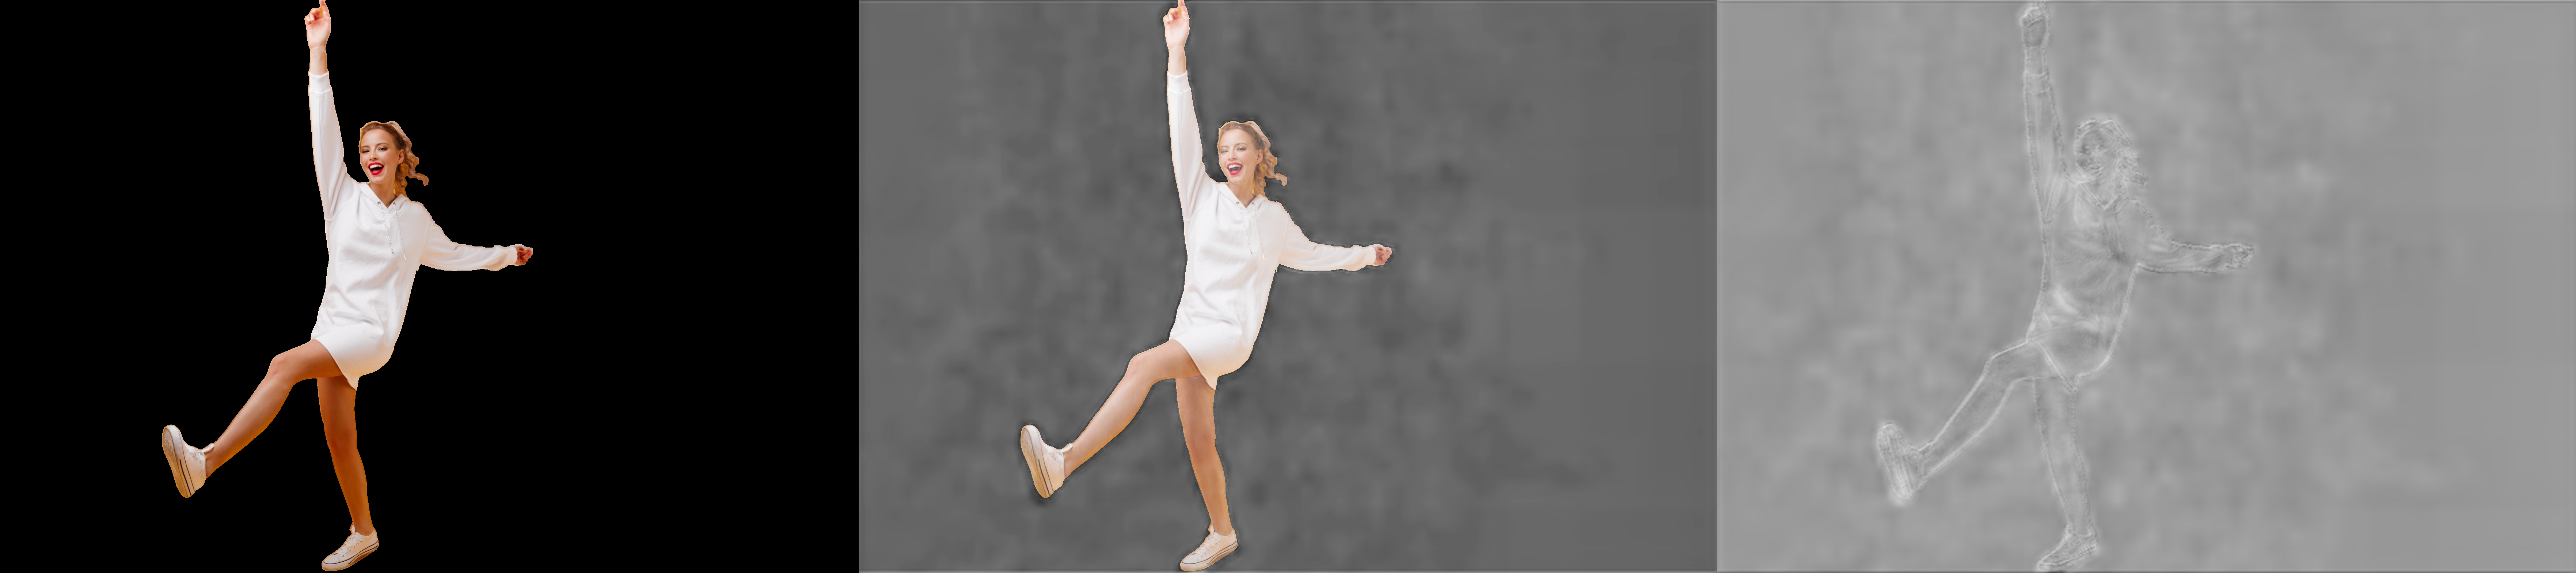

In [8]:
dream.show(2)

In [10]:
after = ModNetImageGenerator(files,model,ckpt_path="ownmodel.pth")

RuntimeError: Error(s) in loading state_dict for FiniteNet:
	Missing key(s) in state_dict: "mobilenetv3.features.0.0.weight", "mobilenetv3.features.0.1.weight", "mobilenetv3.features.0.1.bias", "mobilenetv3.features.0.1.running_mean", "mobilenetv3.features.0.1.running_var", "mobilenetv3.features.1.block.0.0.weight", "mobilenetv3.features.1.block.0.1.weight", "mobilenetv3.features.1.block.0.1.bias", "mobilenetv3.features.1.block.0.1.running_mean", "mobilenetv3.features.1.block.0.1.running_var", "mobilenetv3.features.1.block.1.0.weight", "mobilenetv3.features.1.block.1.1.weight", "mobilenetv3.features.1.block.1.1.bias", "mobilenetv3.features.1.block.1.1.running_mean", "mobilenetv3.features.1.block.1.1.running_var", "mobilenetv3.features.2.block.0.0.weight", "mobilenetv3.features.2.block.0.1.weight", "mobilenetv3.features.2.block.0.1.bias", "mobilenetv3.features.2.block.0.1.running_mean", "mobilenetv3.features.2.block.0.1.running_var", "mobilenetv3.features.2.block.1.0.weight", "mobilenetv3.features.2.block.1.1.weight", "mobilenetv3.features.2.block.1.1.bias", "mobilenetv3.features.2.block.1.1.running_mean", "mobilenetv3.features.2.block.1.1.running_var", "mobilenetv3.features.2.block.2.0.weight", "mobilenetv3.features.2.block.2.1.weight", "mobilenetv3.features.2.block.2.1.bias", "mobilenetv3.features.2.block.2.1.running_mean", "mobilenetv3.features.2.block.2.1.running_var", "mobilenetv3.features.3.block.0.0.weight", "mobilenetv3.features.3.block.0.1.weight", "mobilenetv3.features.3.block.0.1.bias", "mobilenetv3.features.3.block.0.1.running_mean", "mobilenetv3.features.3.block.0.1.running_var", "mobilenetv3.features.3.block.1.0.weight", "mobilenetv3.features.3.block.1.1.weight", "mobilenetv3.features.3.block.1.1.bias", "mobilenetv3.features.3.block.1.1.running_mean", "mobilenetv3.features.3.block.1.1.running_var", "mobilenetv3.features.3.block.2.0.weight", "mobilenetv3.features.3.block.2.1.weight", "mobilenetv3.features.3.block.2.1.bias", "mobilenetv3.features.3.block.2.1.running_mean", "mobilenetv3.features.3.block.2.1.running_var", "mobilenetv3.features.4.block.0.0.weight", "mobilenetv3.features.4.block.0.1.weight", "mobilenetv3.features.4.block.0.1.bias", "mobilenetv3.features.4.block.0.1.running_mean", "mobilenetv3.features.4.block.0.1.running_var", "mobilenetv3.features.4.block.1.0.weight", "mobilenetv3.features.4.block.1.1.weight", "mobilenetv3.features.4.block.1.1.bias", "mobilenetv3.features.4.block.1.1.running_mean", "mobilenetv3.features.4.block.1.1.running_var", "mobilenetv3.features.4.block.2.fc1.weight", "mobilenetv3.features.4.block.2.fc1.bias", "mobilenetv3.features.4.block.2.fc2.weight", "mobilenetv3.features.4.block.2.fc2.bias", "mobilenetv3.features.4.block.3.0.weight", "mobilenetv3.features.4.block.3.1.weight", "mobilenetv3.features.4.block.3.1.bias", "mobilenetv3.features.4.block.3.1.running_mean", "mobilenetv3.features.4.block.3.1.running_var", "mobilenetv3.features.5.block.0.0.weight", "mobilenetv3.features.5.block.0.1.weight", "mobilenetv3.features.5.block.0.1.bias", "mobilenetv3.features.5.block.0.1.running_mean", "mobilenetv3.features.5.block.0.1.running_var", "mobilenetv3.features.5.block.1.0.weight", "mobilenetv3.features.5.block.1.1.weight", "mobilenetv3.features.5.block.1.1.bias", "mobilenetv3.features.5.block.1.1.running_mean", "mobilenetv3.features.5.block.1.1.running_var", "mobilenetv3.features.5.block.2.fc1.weight", "mobilenetv3.features.5.block.2.fc1.bias", "mobilenetv3.features.5.block.2.fc2.weight", "mobilenetv3.features.5.block.2.fc2.bias", "mobilenetv3.features.5.block.3.0.weight", "mobilenetv3.features.5.block.3.1.weight", "mobilenetv3.features.5.block.3.1.bias", "mobilenetv3.features.5.block.3.1.running_mean", "mobilenetv3.features.5.block.3.1.running_var", "mobilenetv3.features.6.block.0.0.weight", "mobilenetv3.features.6.block.0.1.weight", "mobilenetv3.features.6.block.0.1.bias", "mobilenetv3.features.6.block.0.1.running_mean", "mobilenetv3.features.6.block.0.1.running_var", "mobilenetv3.features.6.block.1.0.weight", "mobilenetv3.features.6.block.1.1.weight", "mobilenetv3.features.6.block.1.1.bias", "mobilenetv3.features.6.block.1.1.running_mean", "mobilenetv3.features.6.block.1.1.running_var", "mobilenetv3.features.6.block.2.fc1.weight", "mobilenetv3.features.6.block.2.fc1.bias", "mobilenetv3.features.6.block.2.fc2.weight", "mobilenetv3.features.6.block.2.fc2.bias", "mobilenetv3.features.6.block.3.0.weight", "mobilenetv3.features.6.block.3.1.weight", "mobilenetv3.features.6.block.3.1.bias", "mobilenetv3.features.6.block.3.1.running_mean", "mobilenetv3.features.6.block.3.1.running_var", "mobilenetv3.features.7.block.0.0.weight", "mobilenetv3.features.7.block.0.1.weight", "mobilenetv3.features.7.block.0.1.bias", "mobilenetv3.features.7.block.0.1.running_mean", "mobilenetv3.features.7.block.0.1.running_var", "mobilenetv3.features.7.block.1.0.weight", "mobilenetv3.features.7.block.1.1.weight", "mobilenetv3.features.7.block.1.1.bias", "mobilenetv3.features.7.block.1.1.running_mean", "mobilenetv3.features.7.block.1.1.running_var", "mobilenetv3.features.7.block.2.0.weight", "mobilenetv3.features.7.block.2.1.weight", "mobilenetv3.features.7.block.2.1.bias", "mobilenetv3.features.7.block.2.1.running_mean", "mobilenetv3.features.7.block.2.1.running_var", "mobilenetv3.features.8.block.0.0.weight", "mobilenetv3.features.8.block.0.1.weight", "mobilenetv3.features.8.block.0.1.bias", "mobilenetv3.features.8.block.0.1.running_mean", "mobilenetv3.features.8.block.0.1.running_var", "mobilenetv3.features.8.block.1.0.weight", "mobilenetv3.features.8.block.1.1.weight", "mobilenetv3.features.8.block.1.1.bias", "mobilenetv3.features.8.block.1.1.running_mean", "mobilenetv3.features.8.block.1.1.running_var", "mobilenetv3.features.8.block.2.0.weight", "mobilenetv3.features.8.block.2.1.weight", "mobilenetv3.features.8.block.2.1.bias", "mobilenetv3.features.8.block.2.1.running_mean", "mobilenetv3.features.8.block.2.1.running_var", "mobilenetv3.features.9.block.0.0.weight", "mobilenetv3.features.9.block.0.1.weight", "mobilenetv3.features.9.block.0.1.bias", "mobilenetv3.features.9.block.0.1.running_mean", "mobilenetv3.features.9.block.0.1.running_var", "mobilenetv3.features.9.block.1.0.weight", "mobilenetv3.features.9.block.1.1.weight", "mobilenetv3.features.9.block.1.1.bias", "mobilenetv3.features.9.block.1.1.running_mean", "mobilenetv3.features.9.block.1.1.running_var", "mobilenetv3.features.9.block.2.0.weight", "mobilenetv3.features.9.block.2.1.weight", "mobilenetv3.features.9.block.2.1.bias", "mobilenetv3.features.9.block.2.1.running_mean", "mobilenetv3.features.9.block.2.1.running_var", "mobilenetv3.features.10.block.0.0.weight", "mobilenetv3.features.10.block.0.1.weight", "mobilenetv3.features.10.block.0.1.bias", "mobilenetv3.features.10.block.0.1.running_mean", "mobilenetv3.features.10.block.0.1.running_var", "mobilenetv3.features.10.block.1.0.weight", "mobilenetv3.features.10.block.1.1.weight", "mobilenetv3.features.10.block.1.1.bias", "mobilenetv3.features.10.block.1.1.running_mean", "mobilenetv3.features.10.block.1.1.running_var", "mobilenetv3.features.10.block.2.0.weight", "mobilenetv3.features.10.block.2.1.weight", "mobilenetv3.features.10.block.2.1.bias", "mobilenetv3.features.10.block.2.1.running_mean", "mobilenetv3.features.10.block.2.1.running_var", "mobilenetv3.features.11.block.0.0.weight", "mobilenetv3.features.11.block.0.1.weight", "mobilenetv3.features.11.block.0.1.bias", "mobilenetv3.features.11.block.0.1.running_mean", "mobilenetv3.features.11.block.0.1.running_var", "mobilenetv3.features.11.block.1.0.weight", "mobilenetv3.features.11.block.1.1.weight", "mobilenetv3.features.11.block.1.1.bias", "mobilenetv3.features.11.block.1.1.running_mean", "mobilenetv3.features.11.block.1.1.running_var", "mobilenetv3.features.11.block.2.fc1.weight", "mobilenetv3.features.11.block.2.fc1.bias", "mobilenetv3.features.11.block.2.fc2.weight", "mobilenetv3.features.11.block.2.fc2.bias", "mobilenetv3.features.11.block.3.0.weight", "mobilenetv3.features.11.block.3.1.weight", "mobilenetv3.features.11.block.3.1.bias", "mobilenetv3.features.11.block.3.1.running_mean", "mobilenetv3.features.11.block.3.1.running_var", "mobilenetv3.features.12.block.0.0.weight", "mobilenetv3.features.12.block.0.1.weight", "mobilenetv3.features.12.block.0.1.bias", "mobilenetv3.features.12.block.0.1.running_mean", "mobilenetv3.features.12.block.0.1.running_var", "mobilenetv3.features.12.block.1.0.weight", "mobilenetv3.features.12.block.1.1.weight", "mobilenetv3.features.12.block.1.1.bias", "mobilenetv3.features.12.block.1.1.running_mean", "mobilenetv3.features.12.block.1.1.running_var", "mobilenetv3.features.12.block.2.fc1.weight", "mobilenetv3.features.12.block.2.fc1.bias", "mobilenetv3.features.12.block.2.fc2.weight", "mobilenetv3.features.12.block.2.fc2.bias", "mobilenetv3.features.12.block.3.0.weight", "mobilenetv3.features.12.block.3.1.weight", "mobilenetv3.features.12.block.3.1.bias", "mobilenetv3.features.12.block.3.1.running_mean", "mobilenetv3.features.12.block.3.1.running_var", "mobilenetv3.features.13.block.0.0.weight", "mobilenetv3.features.13.block.0.1.weight", "mobilenetv3.features.13.block.0.1.bias", "mobilenetv3.features.13.block.0.1.running_mean", "mobilenetv3.features.13.block.0.1.running_var", "mobilenetv3.features.13.block.1.0.weight", "mobilenetv3.features.13.block.1.1.weight", "mobilenetv3.features.13.block.1.1.bias", "mobilenetv3.features.13.block.1.1.running_mean", "mobilenetv3.features.13.block.1.1.running_var", "mobilenetv3.features.13.block.2.fc1.weight", "mobilenetv3.features.13.block.2.fc1.bias", "mobilenetv3.features.13.block.2.fc2.weight", "mobilenetv3.features.13.block.2.fc2.bias", "mobilenetv3.features.13.block.3.0.weight", "mobilenetv3.features.13.block.3.1.weight", "mobilenetv3.features.13.block.3.1.bias", "mobilenetv3.features.13.block.3.1.running_mean", "mobilenetv3.features.13.block.3.1.running_var", "mobilenetv3.features.14.block.0.0.weight", "mobilenetv3.features.14.block.0.1.weight", "mobilenetv3.features.14.block.0.1.bias", "mobilenetv3.features.14.block.0.1.running_mean", "mobilenetv3.features.14.block.0.1.running_var", "mobilenetv3.features.14.block.1.0.weight", "mobilenetv3.features.14.block.1.1.weight", "mobilenetv3.features.14.block.1.1.bias", "mobilenetv3.features.14.block.1.1.running_mean", "mobilenetv3.features.14.block.1.1.running_var", "mobilenetv3.features.14.block.2.fc1.weight", "mobilenetv3.features.14.block.2.fc1.bias", "mobilenetv3.features.14.block.2.fc2.weight", "mobilenetv3.features.14.block.2.fc2.bias", "mobilenetv3.features.14.block.3.0.weight", "mobilenetv3.features.14.block.3.1.weight", "mobilenetv3.features.14.block.3.1.bias", "mobilenetv3.features.14.block.3.1.running_mean", "mobilenetv3.features.14.block.3.1.running_var", "mobilenetv3.features.15.block.0.0.weight", "mobilenetv3.features.15.block.0.1.weight", "mobilenetv3.features.15.block.0.1.bias", "mobilenetv3.features.15.block.0.1.running_mean", "mobilenetv3.features.15.block.0.1.running_var", "mobilenetv3.features.15.block.1.0.weight", "mobilenetv3.features.15.block.1.1.weight", "mobilenetv3.features.15.block.1.1.bias", "mobilenetv3.features.15.block.1.1.running_mean", "mobilenetv3.features.15.block.1.1.running_var", "mobilenetv3.features.15.block.2.fc1.weight", "mobilenetv3.features.15.block.2.fc1.bias", "mobilenetv3.features.15.block.2.fc2.weight", "mobilenetv3.features.15.block.2.fc2.bias", "mobilenetv3.features.15.block.3.0.weight", "mobilenetv3.features.15.block.3.1.weight", "mobilenetv3.features.15.block.3.1.bias", "mobilenetv3.features.15.block.3.1.running_mean", "mobilenetv3.features.15.block.3.1.running_var", "mobilenetv3.features.16.0.weight", "mobilenetv3.features.16.1.weight", "mobilenetv3.features.16.1.bias", "mobilenetv3.features.16.1.running_mean", "mobilenetv3.features.16.1.running_var", "mobilenetv3.classifier.0.weight", "mobilenetv3.classifier.0.bias", "mobilenetv3.classifier.3.weight", "mobilenetv3.classifier.3.bias", "features.0.0.weight", "features.0.1.weight", "features.0.1.bias", "features.0.1.running_mean", "features.0.1.running_var", "features.1.block.0.0.weight", "features.1.block.0.1.weight", "features.1.block.0.1.bias", "features.1.block.0.1.running_mean", "features.1.block.0.1.running_var", "features.1.block.1.0.weight", "features.1.block.1.1.weight", "features.1.block.1.1.bias", "features.1.block.1.1.running_mean", "features.1.block.1.1.running_var", "features.2.block.0.0.weight", "features.2.block.0.1.weight", "features.2.block.0.1.bias", "features.2.block.0.1.running_mean", "features.2.block.0.1.running_var", "features.2.block.1.0.weight", "features.2.block.1.1.weight", "features.2.block.1.1.bias", "features.2.block.1.1.running_mean", "features.2.block.1.1.running_var", "features.2.block.2.0.weight", "features.2.block.2.1.weight", "features.2.block.2.1.bias", "features.2.block.2.1.running_mean", "features.2.block.2.1.running_var", "features.3.block.0.0.weight", "features.3.block.0.1.weight", "features.3.block.0.1.bias", "features.3.block.0.1.running_mean", "features.3.block.0.1.running_var", "features.3.block.1.0.weight", "features.3.block.1.1.weight", "features.3.block.1.1.bias", "features.3.block.1.1.running_mean", "features.3.block.1.1.running_var", "features.3.block.2.0.weight", "features.3.block.2.1.weight", "features.3.block.2.1.bias", "features.3.block.2.1.running_mean", "features.3.block.2.1.running_var", "features.4.block.0.0.weight", "features.4.block.0.1.weight", "features.4.block.0.1.bias", "features.4.block.0.1.running_mean", "features.4.block.0.1.running_var", "features.4.block.1.0.weight", "features.4.block.1.1.weight", "features.4.block.1.1.bias", "features.4.block.1.1.running_mean", "features.4.block.1.1.running_var", "features.4.block.2.fc1.weight", "features.4.block.2.fc1.bias", "features.4.block.2.fc2.weight", "features.4.block.2.fc2.bias", "features.4.block.3.0.weight", "features.4.block.3.1.weight", "features.4.block.3.1.bias", "features.4.block.3.1.running_mean", "features.4.block.3.1.running_var", "features.5.block.0.0.weight", "features.5.block.0.1.weight", "features.5.block.0.1.bias", "features.5.block.0.1.running_mean", "features.5.block.0.1.running_var", "features.5.block.1.0.weight", "features.5.block.1.1.weight", "features.5.block.1.1.bias", "features.5.block.1.1.running_mean", "features.5.block.1.1.running_var", "features.5.block.2.fc1.weight", "features.5.block.2.fc1.bias", "features.5.block.2.fc2.weight", "features.5.block.2.fc2.bias", "features.5.block.3.0.weight", "features.5.block.3.1.weight", "features.5.block.3.1.bias", "features.5.block.3.1.running_mean", "features.5.block.3.1.running_var", "features.6.block.0.0.weight", "features.6.block.0.1.weight", "features.6.block.0.1.bias", "features.6.block.0.1.running_mean", "features.6.block.0.1.running_var", "features.6.block.1.0.weight", "features.6.block.1.1.weight", "features.6.block.1.1.bias", "features.6.block.1.1.running_mean", "features.6.block.1.1.running_var", "features.6.block.2.fc1.weight", "features.6.block.2.fc1.bias", "features.6.block.2.fc2.weight", "features.6.block.2.fc2.bias", "features.6.block.3.0.weight", "features.6.block.3.1.weight", "features.6.block.3.1.bias", "features.6.block.3.1.running_mean", "features.6.block.3.1.running_var", "features.7.block.0.0.weight", "features.7.block.0.1.weight", "features.7.block.0.1.bias", "features.7.block.0.1.running_mean", "features.7.block.0.1.running_var", "features.7.block.1.0.weight", "features.7.block.1.1.weight", "features.7.block.1.1.bias", "features.7.block.1.1.running_mean", "features.7.block.1.1.running_var", "features.7.block.2.0.weight", "features.7.block.2.1.weight", "features.7.block.2.1.bias", "features.7.block.2.1.running_mean", "features.7.block.2.1.running_var", "features.8.block.0.0.weight", "features.8.block.0.1.weight", "features.8.block.0.1.bias", "features.8.block.0.1.running_mean", "features.8.block.0.1.running_var", "features.8.block.1.0.weight", "features.8.block.1.1.weight", "features.8.block.1.1.bias", "features.8.block.1.1.running_mean", "features.8.block.1.1.running_var", "features.8.block.2.0.weight", "features.8.block.2.1.weight", "features.8.block.2.1.bias", "features.8.block.2.1.running_mean", "features.8.block.2.1.running_var", "features.9.block.0.0.weight", "features.9.block.0.1.weight", "features.9.block.0.1.bias", "features.9.block.0.1.running_mean", "features.9.block.0.1.running_var", "features.9.block.1.0.weight", "features.9.block.1.1.weight", "features.9.block.1.1.bias", "features.9.block.1.1.running_mean", "features.9.block.1.1.running_var", "features.9.block.2.0.weight", "features.9.block.2.1.weight", "features.9.block.2.1.bias", "features.9.block.2.1.running_mean", "features.9.block.2.1.running_var", "features.10.block.0.0.weight", "features.10.block.0.1.weight", "features.10.block.0.1.bias", "features.10.block.0.1.running_mean", "features.10.block.0.1.running_var", "features.10.block.1.0.weight", "features.10.block.1.1.weight", "features.10.block.1.1.bias", "features.10.block.1.1.running_mean", "features.10.block.1.1.running_var", "features.10.block.2.0.weight", "features.10.block.2.1.weight", "features.10.block.2.1.bias", "features.10.block.2.1.running_mean", "features.10.block.2.1.running_var", "features.11.block.0.0.weight", "features.11.block.0.1.weight", "features.11.block.0.1.bias", "features.11.block.0.1.running_mean", "features.11.block.0.1.running_var", "features.11.block.1.0.weight", "features.11.block.1.1.weight", "features.11.block.1.1.bias", "features.11.block.1.1.running_mean", "features.11.block.1.1.running_var", "features.11.block.2.fc1.weight", "features.11.block.2.fc1.bias", "features.11.block.2.fc2.weight", "features.11.block.2.fc2.bias", "features.11.block.3.0.weight", "features.11.block.3.1.weight", "features.11.block.3.1.bias", "features.11.block.3.1.running_mean", "features.11.block.3.1.running_var", "features.12.block.0.0.weight", "features.12.block.0.1.weight", "features.12.block.0.1.bias", "features.12.block.0.1.running_mean", "features.12.block.0.1.running_var", "features.12.block.1.0.weight", "features.12.block.1.1.weight", "features.12.block.1.1.bias", "features.12.block.1.1.running_mean", "features.12.block.1.1.running_var", "features.12.block.2.fc1.weight", "features.12.block.2.fc1.bias", "features.12.block.2.fc2.weight", "features.12.block.2.fc2.bias", "features.12.block.3.0.weight", "features.12.block.3.1.weight", "features.12.block.3.1.bias", "features.12.block.3.1.running_mean", "features.12.block.3.1.running_var", "features.13.block.0.0.weight", "features.13.block.0.1.weight", "features.13.block.0.1.bias", "features.13.block.0.1.running_mean", "features.13.block.0.1.running_var", "features.13.block.1.0.weight", "features.13.block.1.1.weight", "features.13.block.1.1.bias", "features.13.block.1.1.running_mean", "features.13.block.1.1.running_var", "features.13.block.2.fc1.weight", "features.13.block.2.fc1.bias", "features.13.block.2.fc2.weight", "features.13.block.2.fc2.bias", "features.13.block.3.0.weight", "features.13.block.3.1.weight", "features.13.block.3.1.bias", "features.13.block.3.1.running_mean", "features.13.block.3.1.running_var", "features.14.block.0.0.weight", "features.14.block.0.1.weight", "features.14.block.0.1.bias", "features.14.block.0.1.running_mean", "features.14.block.0.1.running_var", "features.14.block.1.0.weight", "features.14.block.1.1.weight", "features.14.block.1.1.bias", "features.14.block.1.1.running_mean", "features.14.block.1.1.running_var", "features.14.block.2.fc1.weight", "features.14.block.2.fc1.bias", "features.14.block.2.fc2.weight", "features.14.block.2.fc2.bias", "features.14.block.3.0.weight", "features.14.block.3.1.weight", "features.14.block.3.1.bias", "features.14.block.3.1.running_mean", "features.14.block.3.1.running_var", "features.15.block.0.0.weight", "features.15.block.0.1.weight", "features.15.block.0.1.bias", "features.15.block.0.1.running_mean", "features.15.block.0.1.running_var", "features.15.block.1.0.weight", "features.15.block.1.1.weight", "features.15.block.1.1.bias", "features.15.block.1.1.running_mean", "features.15.block.1.1.running_var", "features.15.block.2.fc1.weight", "features.15.block.2.fc1.bias", "features.15.block.2.fc2.weight", "features.15.block.2.fc2.bias", "features.15.block.3.0.weight", "features.15.block.3.1.weight", "features.15.block.3.1.bias", "features.15.block.3.1.running_mean", "features.15.block.3.1.running_var", "features.16.0.weight", "features.16.1.weight", "features.16.1.bias", "features.16.1.running_mean", "features.16.1.running_var", "keypoint_head.conv_layers.0.weight", "keypoint_head.conv_layers.0.bias", "keypoint_head.conv_layers.2.weight", "keypoint_head.conv_layers.2.bias", "keypoint_head.conv_layers.4.weight", "keypoint_head.conv_layers.4.bias", "keypoint_head.conv_layers.6.weight", "keypoint_head.conv_layers.6.bias", "keypoint_head.part_segmentation_head.conv1.weight", "keypoint_head.part_segmentation_head.conv1.bias", "keypoint_head.part_segmentation_head.conv2.weight", "keypoint_head.part_segmentation_head.conv2.bias", "keypoint_head.part_segmentation_head.conv3.weight", "keypoint_head.part_segmentation_head.conv3.bias", "keypoint_head.feature_enhancement_modules.0.channel_attention.1.weight", "keypoint_head.feature_enhancement_modules.0.channel_attention.1.bias", "keypoint_head.feature_enhancement_modules.0.channel_attention.3.weight", "keypoint_head.feature_enhancement_modules.0.channel_attention.3.bias", "keypoint_head.feature_enhancement_modules.0.spatial_attention.0.weight", "keypoint_head.feature_enhancement_modules.0.spatial_attention.0.bias", "keypoint_head.feature_enhancement_modules.1.channel_attention.1.weight", "keypoint_head.feature_enhancement_modules.1.channel_attention.1.bias", "keypoint_head.feature_enhancement_modules.1.channel_attention.3.weight", "keypoint_head.feature_enhancement_modules.1.channel_attention.3.bias", "keypoint_head.feature_enhancement_modules.1.spatial_attention.0.weight", "keypoint_head.feature_enhancement_modules.1.spatial_attention.0.bias", "keypoint_head.feature_enhancement_modules.2.channel_attention.1.weight", "keypoint_head.feature_enhancement_modules.2.channel_attention.1.bias", "keypoint_head.feature_enhancement_modules.2.channel_attention.3.weight", "keypoint_head.feature_enhancement_modules.2.channel_attention.3.bias", "keypoint_head.feature_enhancement_modules.2.spatial_attention.0.weight", "keypoint_head.feature_enhancement_modules.2.spatial_attention.0.bias", "keypoint_head.feature_enhancement_modules.3.channel_attention.1.weight", "keypoint_head.feature_enhancement_modules.3.channel_attention.1.bias", "keypoint_head.feature_enhancement_modules.3.channel_attention.3.weight", "keypoint_head.feature_enhancement_modules.3.channel_attention.3.bias", "keypoint_head.feature_enhancement_modules.3.spatial_attention.0.weight", "keypoint_head.feature_enhancement_modules.3.spatial_attention.0.bias", "keypoint_head.feature_enhancement_modules.4.channel_attention.1.weight", "keypoint_head.feature_enhancement_modules.4.channel_attention.1.bias", "keypoint_head.feature_enhancement_modules.4.channel_attention.3.weight", "keypoint_head.feature_enhancement_modules.4.channel_attention.3.bias", "keypoint_head.feature_enhancement_modules.4.spatial_attention.0.weight", "keypoint_head.feature_enhancement_modules.4.spatial_attention.0.bias", "keypoint_head.feature_enhancement_modules.5.channel_attention.1.weight", "keypoint_head.feature_enhancement_modules.5.channel_attention.1.bias", "keypoint_head.feature_enhancement_modules.5.channel_attention.3.weight", "keypoint_head.feature_enhancement_modules.5.channel_attention.3.bias", "keypoint_head.feature_enhancement_modules.5.spatial_attention.0.weight", "keypoint_head.feature_enhancement_modules.5.spatial_attention.0.bias", "keypoint_head.attention_refine.0.weight", "keypoint_head.attention_refine.0.bias", "keypoint_head.attention_refine.2.weight", "keypoint_head.attention_refine.2.bias", "keypoint_head.channel_matching_conv.weight", "keypoint_head.channel_matching_conv.bias", "keypoint_head.channel_adjust.weight", "keypoint_head.channel_adjust.bias", "feature_fusion.aspp.global_avg_pool.1.weight", "feature_fusion.aspp.global_avg_pool.2.weight", "feature_fusion.aspp.global_avg_pool.2.bias", "feature_fusion.aspp.convs.0.0.weight", "feature_fusion.aspp.convs.0.1.weight", "feature_fusion.aspp.convs.0.1.bias", "feature_fusion.aspp.convs.1.0.weight", "feature_fusion.aspp.convs.1.1.weight", "feature_fusion.aspp.convs.1.1.bias", "feature_fusion.aspp.convs.2.0.weight", "feature_fusion.aspp.convs.2.1.weight", "feature_fusion.aspp.convs.2.1.bias", "feature_fusion.aspp.convs.3.0.weight", "feature_fusion.aspp.convs.3.1.weight", "feature_fusion.aspp.convs.3.1.bias", "feature_fusion.aspp.project.0.weight", "feature_fusion.aspp.project.1.weight", "feature_fusion.aspp.project.1.bias", "feature_fusion.conv_low.0.weight", "feature_fusion.conv_low.1.weight", "feature_fusion.conv_low.1.bias", "feature_fusion.conv_mid.0.weight", "feature_fusion.conv_mid.1.weight", "feature_fusion.conv_mid.1.bias", "feature_fusion.conv_enhanced.0.weight", "feature_fusion.conv_enhanced.1.weight", "feature_fusion.conv_enhanced.1.bias", "feature_fusion.conv_attended.0.weight", "feature_fusion.conv_attended.1.weight", "feature_fusion.conv_attended.1.bias", "matting_head.conv1.weight", "matting_head.bn1.weight", "matting_head.bn1.bias", "matting_head.bn1.running_mean", "matting_head.bn1.running_var", "matting_head.conv2.weight". 
	Unexpected key(s) in state_dict: "module.mobilenetv3.features.0.0.weight", "module.mobilenetv3.features.0.1.weight", "module.mobilenetv3.features.0.1.bias", "module.mobilenetv3.features.0.1.running_mean", "module.mobilenetv3.features.0.1.running_var", "module.mobilenetv3.features.0.1.num_batches_tracked", "module.mobilenetv3.features.1.block.0.0.weight", "module.mobilenetv3.features.1.block.0.1.weight", "module.mobilenetv3.features.1.block.0.1.bias", "module.mobilenetv3.features.1.block.0.1.running_mean", "module.mobilenetv3.features.1.block.0.1.running_var", "module.mobilenetv3.features.1.block.0.1.num_batches_tracked", "module.mobilenetv3.features.1.block.1.0.weight", "module.mobilenetv3.features.1.block.1.1.weight", "module.mobilenetv3.features.1.block.1.1.bias", "module.mobilenetv3.features.1.block.1.1.running_mean", "module.mobilenetv3.features.1.block.1.1.running_var", "module.mobilenetv3.features.1.block.1.1.num_batches_tracked", "module.mobilenetv3.features.2.block.0.0.weight", "module.mobilenetv3.features.2.block.0.1.weight", "module.mobilenetv3.features.2.block.0.1.bias", "module.mobilenetv3.features.2.block.0.1.running_mean", "module.mobilenetv3.features.2.block.0.1.running_var", "module.mobilenetv3.features.2.block.0.1.num_batches_tracked", "module.mobilenetv3.features.2.block.1.0.weight", "module.mobilenetv3.features.2.block.1.1.weight", "module.mobilenetv3.features.2.block.1.1.bias", "module.mobilenetv3.features.2.block.1.1.running_mean", "module.mobilenetv3.features.2.block.1.1.running_var", "module.mobilenetv3.features.2.block.1.1.num_batches_tracked", "module.mobilenetv3.features.2.block.2.0.weight", "module.mobilenetv3.features.2.block.2.1.weight", "module.mobilenetv3.features.2.block.2.1.bias", "module.mobilenetv3.features.2.block.2.1.running_mean", "module.mobilenetv3.features.2.block.2.1.running_var", "module.mobilenetv3.features.2.block.2.1.num_batches_tracked", "module.mobilenetv3.features.3.block.0.0.weight", "module.mobilenetv3.features.3.block.0.1.weight", "module.mobilenetv3.features.3.block.0.1.bias", "module.mobilenetv3.features.3.block.0.1.running_mean", "module.mobilenetv3.features.3.block.0.1.running_var", "module.mobilenetv3.features.3.block.0.1.num_batches_tracked", "module.mobilenetv3.features.3.block.1.0.weight", "module.mobilenetv3.features.3.block.1.1.weight", "module.mobilenetv3.features.3.block.1.1.bias", "module.mobilenetv3.features.3.block.1.1.running_mean", "module.mobilenetv3.features.3.block.1.1.running_var", "module.mobilenetv3.features.3.block.1.1.num_batches_tracked", "module.mobilenetv3.features.3.block.2.0.weight", "module.mobilenetv3.features.3.block.2.1.weight", "module.mobilenetv3.features.3.block.2.1.bias", "module.mobilenetv3.features.3.block.2.1.running_mean", "module.mobilenetv3.features.3.block.2.1.running_var", "module.mobilenetv3.features.3.block.2.1.num_batches_tracked", "module.mobilenetv3.features.4.block.0.0.weight", "module.mobilenetv3.features.4.block.0.1.weight", "module.mobilenetv3.features.4.block.0.1.bias", "module.mobilenetv3.features.4.block.0.1.running_mean", "module.mobilenetv3.features.4.block.0.1.running_var", "module.mobilenetv3.features.4.block.0.1.num_batches_tracked", "module.mobilenetv3.features.4.block.1.0.weight", "module.mobilenetv3.features.4.block.1.1.weight", "module.mobilenetv3.features.4.block.1.1.bias", "module.mobilenetv3.features.4.block.1.1.running_mean", "module.mobilenetv3.features.4.block.1.1.running_var", "module.mobilenetv3.features.4.block.1.1.num_batches_tracked", "module.mobilenetv3.features.4.block.2.fc1.weight", "module.mobilenetv3.features.4.block.2.fc1.bias", "module.mobilenetv3.features.4.block.2.fc2.weight", "module.mobilenetv3.features.4.block.2.fc2.bias", "module.mobilenetv3.features.4.block.3.0.weight", "module.mobilenetv3.features.4.block.3.1.weight", "module.mobilenetv3.features.4.block.3.1.bias", "module.mobilenetv3.features.4.block.3.1.running_mean", "module.mobilenetv3.features.4.block.3.1.running_var", "module.mobilenetv3.features.4.block.3.1.num_batches_tracked", "module.mobilenetv3.features.5.block.0.0.weight", "module.mobilenetv3.features.5.block.0.1.weight", "module.mobilenetv3.features.5.block.0.1.bias", "module.mobilenetv3.features.5.block.0.1.running_mean", "module.mobilenetv3.features.5.block.0.1.running_var", "module.mobilenetv3.features.5.block.0.1.num_batches_tracked", "module.mobilenetv3.features.5.block.1.0.weight", "module.mobilenetv3.features.5.block.1.1.weight", "module.mobilenetv3.features.5.block.1.1.bias", "module.mobilenetv3.features.5.block.1.1.running_mean", "module.mobilenetv3.features.5.block.1.1.running_var", "module.mobilenetv3.features.5.block.1.1.num_batches_tracked", "module.mobilenetv3.features.5.block.2.fc1.weight", "module.mobilenetv3.features.5.block.2.fc1.bias", "module.mobilenetv3.features.5.block.2.fc2.weight", "module.mobilenetv3.features.5.block.2.fc2.bias", "module.mobilenetv3.features.5.block.3.0.weight", "module.mobilenetv3.features.5.block.3.1.weight", "module.mobilenetv3.features.5.block.3.1.bias", "module.mobilenetv3.features.5.block.3.1.running_mean", "module.mobilenetv3.features.5.block.3.1.running_var", "module.mobilenetv3.features.5.block.3.1.num_batches_tracked", "module.mobilenetv3.features.6.block.0.0.weight", "module.mobilenetv3.features.6.block.0.1.weight", "module.mobilenetv3.features.6.block.0.1.bias", "module.mobilenetv3.features.6.block.0.1.running_mean", "module.mobilenetv3.features.6.block.0.1.running_var", "module.mobilenetv3.features.6.block.0.1.num_batches_tracked", "module.mobilenetv3.features.6.block.1.0.weight", "module.mobilenetv3.features.6.block.1.1.weight", "module.mobilenetv3.features.6.block.1.1.bias", "module.mobilenetv3.features.6.block.1.1.running_mean", "module.mobilenetv3.features.6.block.1.1.running_var", "module.mobilenetv3.features.6.block.1.1.num_batches_tracked", "module.mobilenetv3.features.6.block.2.fc1.weight", "module.mobilenetv3.features.6.block.2.fc1.bias", "module.mobilenetv3.features.6.block.2.fc2.weight", "module.mobilenetv3.features.6.block.2.fc2.bias", "module.mobilenetv3.features.6.block.3.0.weight", "module.mobilenetv3.features.6.block.3.1.weight", "module.mobilenetv3.features.6.block.3.1.bias", "module.mobilenetv3.features.6.block.3.1.running_mean", "module.mobilenetv3.features.6.block.3.1.running_var", "module.mobilenetv3.features.6.block.3.1.num_batches_tracked", "module.mobilenetv3.features.7.block.0.0.weight", "module.mobilenetv3.features.7.block.0.1.weight", "module.mobilenetv3.features.7.block.0.1.bias", "module.mobilenetv3.features.7.block.0.1.running_mean", "module.mobilenetv3.features.7.block.0.1.running_var", "module.mobilenetv3.features.7.block.0.1.num_batches_tracked", "module.mobilenetv3.features.7.block.1.0.weight", "module.mobilenetv3.features.7.block.1.1.weight", "module.mobilenetv3.features.7.block.1.1.bias", "module.mobilenetv3.features.7.block.1.1.running_mean", "module.mobilenetv3.features.7.block.1.1.running_var", "module.mobilenetv3.features.7.block.1.1.num_batches_tracked", "module.mobilenetv3.features.7.block.2.0.weight", "module.mobilenetv3.features.7.block.2.1.weight", "module.mobilenetv3.features.7.block.2.1.bias", "module.mobilenetv3.features.7.block.2.1.running_mean", "module.mobilenetv3.features.7.block.2.1.running_var", "module.mobilenetv3.features.7.block.2.1.num_batches_tracked", "module.mobilenetv3.features.8.block.0.0.weight", "module.mobilenetv3.features.8.block.0.1.weight", "module.mobilenetv3.features.8.block.0.1.bias", "module.mobilenetv3.features.8.block.0.1.running_mean", "module.mobilenetv3.features.8.block.0.1.running_var", "module.mobilenetv3.features.8.block.0.1.num_batches_tracked", "module.mobilenetv3.features.8.block.1.0.weight", "module.mobilenetv3.features.8.block.1.1.weight", "module.mobilenetv3.features.8.block.1.1.bias", "module.mobilenetv3.features.8.block.1.1.running_mean", "module.mobilenetv3.features.8.block.1.1.running_var", "module.mobilenetv3.features.8.block.1.1.num_batches_tracked", "module.mobilenetv3.features.8.block.2.0.weight", "module.mobilenetv3.features.8.block.2.1.weight", "module.mobilenetv3.features.8.block.2.1.bias", "module.mobilenetv3.features.8.block.2.1.running_mean", "module.mobilenetv3.features.8.block.2.1.running_var", "module.mobilenetv3.features.8.block.2.1.num_batches_tracked", "module.mobilenetv3.features.9.block.0.0.weight", "module.mobilenetv3.features.9.block.0.1.weight", "module.mobilenetv3.features.9.block.0.1.bias", "module.mobilenetv3.features.9.block.0.1.running_mean", "module.mobilenetv3.features.9.block.0.1.running_var", "module.mobilenetv3.features.9.block.0.1.num_batches_tracked", "module.mobilenetv3.features.9.block.1.0.weight", "module.mobilenetv3.features.9.block.1.1.weight", "module.mobilenetv3.features.9.block.1.1.bias", "module.mobilenetv3.features.9.block.1.1.running_mean", "module.mobilenetv3.features.9.block.1.1.running_var", "module.mobilenetv3.features.9.block.1.1.num_batches_tracked", "module.mobilenetv3.features.9.block.2.0.weight", "module.mobilenetv3.features.9.block.2.1.weight", "module.mobilenetv3.features.9.block.2.1.bias", "module.mobilenetv3.features.9.block.2.1.running_mean", "module.mobilenetv3.features.9.block.2.1.running_var", "module.mobilenetv3.features.9.block.2.1.num_batches_tracked", "module.mobilenetv3.features.10.block.0.0.weight", "module.mobilenetv3.features.10.block.0.1.weight", "module.mobilenetv3.features.10.block.0.1.bias", "module.mobilenetv3.features.10.block.0.1.running_mean", "module.mobilenetv3.features.10.block.0.1.running_var", "module.mobilenetv3.features.10.block.0.1.num_batches_tracked", "module.mobilenetv3.features.10.block.1.0.weight", "module.mobilenetv3.features.10.block.1.1.weight", "module.mobilenetv3.features.10.block.1.1.bias", "module.mobilenetv3.features.10.block.1.1.running_mean", "module.mobilenetv3.features.10.block.1.1.running_var", "module.mobilenetv3.features.10.block.1.1.num_batches_tracked", "module.mobilenetv3.features.10.block.2.0.weight", "module.mobilenetv3.features.10.block.2.1.weight", "module.mobilenetv3.features.10.block.2.1.bias", "module.mobilenetv3.features.10.block.2.1.running_mean", "module.mobilenetv3.features.10.block.2.1.running_var", "module.mobilenetv3.features.10.block.2.1.num_batches_tracked", "module.mobilenetv3.features.11.block.0.0.weight", "module.mobilenetv3.features.11.block.0.1.weight", "module.mobilenetv3.features.11.block.0.1.bias", "module.mobilenetv3.features.11.block.0.1.running_mean", "module.mobilenetv3.features.11.block.0.1.running_var", "module.mobilenetv3.features.11.block.0.1.num_batches_tracked", "module.mobilenetv3.features.11.block.1.0.weight", "module.mobilenetv3.features.11.block.1.1.weight", "module.mobilenetv3.features.11.block.1.1.bias", "module.mobilenetv3.features.11.block.1.1.running_mean", "module.mobilenetv3.features.11.block.1.1.running_var", "module.mobilenetv3.features.11.block.1.1.num_batches_tracked", "module.mobilenetv3.features.11.block.2.fc1.weight", "module.mobilenetv3.features.11.block.2.fc1.bias", "module.mobilenetv3.features.11.block.2.fc2.weight", "module.mobilenetv3.features.11.block.2.fc2.bias", "module.mobilenetv3.features.11.block.3.0.weight", "module.mobilenetv3.features.11.block.3.1.weight", "module.mobilenetv3.features.11.block.3.1.bias", "module.mobilenetv3.features.11.block.3.1.running_mean", "module.mobilenetv3.features.11.block.3.1.running_var", "module.mobilenetv3.features.11.block.3.1.num_batches_tracked", "module.mobilenetv3.features.12.block.0.0.weight", "module.mobilenetv3.features.12.block.0.1.weight", "module.mobilenetv3.features.12.block.0.1.bias", "module.mobilenetv3.features.12.block.0.1.running_mean", "module.mobilenetv3.features.12.block.0.1.running_var", "module.mobilenetv3.features.12.block.0.1.num_batches_tracked", "module.mobilenetv3.features.12.block.1.0.weight", "module.mobilenetv3.features.12.block.1.1.weight", "module.mobilenetv3.features.12.block.1.1.bias", "module.mobilenetv3.features.12.block.1.1.running_mean", "module.mobilenetv3.features.12.block.1.1.running_var", "module.mobilenetv3.features.12.block.1.1.num_batches_tracked", "module.mobilenetv3.features.12.block.2.fc1.weight", "module.mobilenetv3.features.12.block.2.fc1.bias", "module.mobilenetv3.features.12.block.2.fc2.weight", "module.mobilenetv3.features.12.block.2.fc2.bias", "module.mobilenetv3.features.12.block.3.0.weight", "module.mobilenetv3.features.12.block.3.1.weight", "module.mobilenetv3.features.12.block.3.1.bias", "module.mobilenetv3.features.12.block.3.1.running_mean", "module.mobilenetv3.features.12.block.3.1.running_var", "module.mobilenetv3.features.12.block.3.1.num_batches_tracked", "module.mobilenetv3.features.13.block.0.0.weight", "module.mobilenetv3.features.13.block.0.1.weight", "module.mobilenetv3.features.13.block.0.1.bias", "module.mobilenetv3.features.13.block.0.1.running_mean", "module.mobilenetv3.features.13.block.0.1.running_var", "module.mobilenetv3.features.13.block.0.1.num_batches_tracked", "module.mobilenetv3.features.13.block.1.0.weight", "module.mobilenetv3.features.13.block.1.1.weight", "module.mobilenetv3.features.13.block.1.1.bias", "module.mobilenetv3.features.13.block.1.1.running_mean", "module.mobilenetv3.features.13.block.1.1.running_var", "module.mobilenetv3.features.13.block.1.1.num_batches_tracked", "module.mobilenetv3.features.13.block.2.fc1.weight", "module.mobilenetv3.features.13.block.2.fc1.bias", "module.mobilenetv3.features.13.block.2.fc2.weight", "module.mobilenetv3.features.13.block.2.fc2.bias", "module.mobilenetv3.features.13.block.3.0.weight", "module.mobilenetv3.features.13.block.3.1.weight", "module.mobilenetv3.features.13.block.3.1.bias", "module.mobilenetv3.features.13.block.3.1.running_mean", "module.mobilenetv3.features.13.block.3.1.running_var", "module.mobilenetv3.features.13.block.3.1.num_batches_tracked", "module.mobilenetv3.features.14.block.0.0.weight", "module.mobilenetv3.features.14.block.0.1.weight", "module.mobilenetv3.features.14.block.0.1.bias", "module.mobilenetv3.features.14.block.0.1.running_mean", "module.mobilenetv3.features.14.block.0.1.running_var", "module.mobilenetv3.features.14.block.0.1.num_batches_tracked", "module.mobilenetv3.features.14.block.1.0.weight", "module.mobilenetv3.features.14.block.1.1.weight", "module.mobilenetv3.features.14.block.1.1.bias", "module.mobilenetv3.features.14.block.1.1.running_mean", "module.mobilenetv3.features.14.block.1.1.running_var", "module.mobilenetv3.features.14.block.1.1.num_batches_tracked", "module.mobilenetv3.features.14.block.2.fc1.weight", "module.mobilenetv3.features.14.block.2.fc1.bias", "module.mobilenetv3.features.14.block.2.fc2.weight", "module.mobilenetv3.features.14.block.2.fc2.bias", "module.mobilenetv3.features.14.block.3.0.weight", "module.mobilenetv3.features.14.block.3.1.weight", "module.mobilenetv3.features.14.block.3.1.bias", "module.mobilenetv3.features.14.block.3.1.running_mean", "module.mobilenetv3.features.14.block.3.1.running_var", "module.mobilenetv3.features.14.block.3.1.num_batches_tracked", "module.mobilenetv3.features.15.block.0.0.weight", "module.mobilenetv3.features.15.block.0.1.weight", "module.mobilenetv3.features.15.block.0.1.bias", "module.mobilenetv3.features.15.block.0.1.running_mean", "module.mobilenetv3.features.15.block.0.1.running_var", "module.mobilenetv3.features.15.block.0.1.num_batches_tracked", "module.mobilenetv3.features.15.block.1.0.weight", "module.mobilenetv3.features.15.block.1.1.weight", "module.mobilenetv3.features.15.block.1.1.bias", "module.mobilenetv3.features.15.block.1.1.running_mean", "module.mobilenetv3.features.15.block.1.1.running_var", "module.mobilenetv3.features.15.block.1.1.num_batches_tracked", "module.mobilenetv3.features.15.block.2.fc1.weight", "module.mobilenetv3.features.15.block.2.fc1.bias", "module.mobilenetv3.features.15.block.2.fc2.weight", "module.mobilenetv3.features.15.block.2.fc2.bias", "module.mobilenetv3.features.15.block.3.0.weight", "module.mobilenetv3.features.15.block.3.1.weight", "module.mobilenetv3.features.15.block.3.1.bias", "module.mobilenetv3.features.15.block.3.1.running_mean", "module.mobilenetv3.features.15.block.3.1.running_var", "module.mobilenetv3.features.15.block.3.1.num_batches_tracked", "module.mobilenetv3.features.16.0.weight", "module.mobilenetv3.features.16.1.weight", "module.mobilenetv3.features.16.1.bias", "module.mobilenetv3.features.16.1.running_mean", "module.mobilenetv3.features.16.1.running_var", "module.mobilenetv3.features.16.1.num_batches_tracked", "module.mobilenetv3.classifier.0.weight", "module.mobilenetv3.classifier.0.bias", "module.mobilenetv3.classifier.3.weight", "module.mobilenetv3.classifier.3.bias", "module.features.0.0.weight", "module.features.0.1.weight", "module.features.0.1.bias", "module.features.0.1.running_mean", "module.features.0.1.running_var", "module.features.0.1.num_batches_tracked", "module.features.1.block.0.0.weight", "module.features.1.block.0.1.weight", "module.features.1.block.0.1.bias", "module.features.1.block.0.1.running_mean", "module.features.1.block.0.1.running_var", "module.features.1.block.0.1.num_batches_tracked", "module.features.1.block.1.0.weight", "module.features.1.block.1.1.weight", "module.features.1.block.1.1.bias", "module.features.1.block.1.1.running_mean", "module.features.1.block.1.1.running_var", "module.features.1.block.1.1.num_batches_tracked", "module.features.2.block.0.0.weight", "module.features.2.block.0.1.weight", "module.features.2.block.0.1.bias", "module.features.2.block.0.1.running_mean", "module.features.2.block.0.1.running_var", "module.features.2.block.0.1.num_batches_tracked", "module.features.2.block.1.0.weight", "module.features.2.block.1.1.weight", "module.features.2.block.1.1.bias", "module.features.2.block.1.1.running_mean", "module.features.2.block.1.1.running_var", "module.features.2.block.1.1.num_batches_tracked", "module.features.2.block.2.0.weight", "module.features.2.block.2.1.weight", "module.features.2.block.2.1.bias", "module.features.2.block.2.1.running_mean", "module.features.2.block.2.1.running_var", "module.features.2.block.2.1.num_batches_tracked", "module.features.3.block.0.0.weight", "module.features.3.block.0.1.weight", "module.features.3.block.0.1.bias", "module.features.3.block.0.1.running_mean", "module.features.3.block.0.1.running_var", "module.features.3.block.0.1.num_batches_tracked", "module.features.3.block.1.0.weight", "module.features.3.block.1.1.weight", "module.features.3.block.1.1.bias", "module.features.3.block.1.1.running_mean", "module.features.3.block.1.1.running_var", "module.features.3.block.1.1.num_batches_tracked", "module.features.3.block.2.0.weight", "module.features.3.block.2.1.weight", "module.features.3.block.2.1.bias", "module.features.3.block.2.1.running_mean", "module.features.3.block.2.1.running_var", "module.features.3.block.2.1.num_batches_tracked", "module.features.4.block.0.0.weight", "module.features.4.block.0.1.weight", "module.features.4.block.0.1.bias", "module.features.4.block.0.1.running_mean", "module.features.4.block.0.1.running_var", "module.features.4.block.0.1.num_batches_tracked", "module.features.4.block.1.0.weight", "module.features.4.block.1.1.weight", "module.features.4.block.1.1.bias", "module.features.4.block.1.1.running_mean", "module.features.4.block.1.1.running_var", "module.features.4.block.1.1.num_batches_tracked", "module.features.4.block.2.fc1.weight", "module.features.4.block.2.fc1.bias", "module.features.4.block.2.fc2.weight", "module.features.4.block.2.fc2.bias", "module.features.4.block.3.0.weight", "module.features.4.block.3.1.weight", "module.features.4.block.3.1.bias", "module.features.4.block.3.1.running_mean", "module.features.4.block.3.1.running_var", "module.features.4.block.3.1.num_batches_tracked", "module.features.5.block.0.0.weight", "module.features.5.block.0.1.weight", "module.features.5.block.0.1.bias", "module.features.5.block.0.1.running_mean", "module.features.5.block.0.1.running_var", "module.features.5.block.0.1.num_batches_tracked", "module.features.5.block.1.0.weight", "module.features.5.block.1.1.weight", "module.features.5.block.1.1.bias", "module.features.5.block.1.1.running_mean", "module.features.5.block.1.1.running_var", "module.features.5.block.1.1.num_batches_tracked", "module.features.5.block.2.fc1.weight", "module.features.5.block.2.fc1.bias", "module.features.5.block.2.fc2.weight", "module.features.5.block.2.fc2.bias", "module.features.5.block.3.0.weight", "module.features.5.block.3.1.weight", "module.features.5.block.3.1.bias", "module.features.5.block.3.1.running_mean", "module.features.5.block.3.1.running_var", "module.features.5.block.3.1.num_batches_tracked", "module.features.6.block.0.0.weight", "module.features.6.block.0.1.weight", "module.features.6.block.0.1.bias", "module.features.6.block.0.1.running_mean", "module.features.6.block.0.1.running_var", "module.features.6.block.0.1.num_batches_tracked", "module.features.6.block.1.0.weight", "module.features.6.block.1.1.weight", "module.features.6.block.1.1.bias", "module.features.6.block.1.1.running_mean", "module.features.6.block.1.1.running_var", "module.features.6.block.1.1.num_batches_tracked", "module.features.6.block.2.fc1.weight", "module.features.6.block.2.fc1.bias", "module.features.6.block.2.fc2.weight", "module.features.6.block.2.fc2.bias", "module.features.6.block.3.0.weight", "module.features.6.block.3.1.weight", "module.features.6.block.3.1.bias", "module.features.6.block.3.1.running_mean", "module.features.6.block.3.1.running_var", "module.features.6.block.3.1.num_batches_tracked", "module.features.7.block.0.0.weight", "module.features.7.block.0.1.weight", "module.features.7.block.0.1.bias", "module.features.7.block.0.1.running_mean", "module.features.7.block.0.1.running_var", "module.features.7.block.0.1.num_batches_tracked", "module.features.7.block.1.0.weight", "module.features.7.block.1.1.weight", "module.features.7.block.1.1.bias", "module.features.7.block.1.1.running_mean", "module.features.7.block.1.1.running_var", "module.features.7.block.1.1.num_batches_tracked", "module.features.7.block.2.0.weight", "module.features.7.block.2.1.weight", "module.features.7.block.2.1.bias", "module.features.7.block.2.1.running_mean", "module.features.7.block.2.1.running_var", "module.features.7.block.2.1.num_batches_tracked", "module.features.8.block.0.0.weight", "module.features.8.block.0.1.weight", "module.features.8.block.0.1.bias", "module.features.8.block.0.1.running_mean", "module.features.8.block.0.1.running_var", "module.features.8.block.0.1.num_batches_tracked", "module.features.8.block.1.0.weight", "module.features.8.block.1.1.weight", "module.features.8.block.1.1.bias", "module.features.8.block.1.1.running_mean", "module.features.8.block.1.1.running_var", "module.features.8.block.1.1.num_batches_tracked", "module.features.8.block.2.0.weight", "module.features.8.block.2.1.weight", "module.features.8.block.2.1.bias", "module.features.8.block.2.1.running_mean", "module.features.8.block.2.1.running_var", "module.features.8.block.2.1.num_batches_tracked", "module.features.9.block.0.0.weight", "module.features.9.block.0.1.weight", "module.features.9.block.0.1.bias", "module.features.9.block.0.1.running_mean", "module.features.9.block.0.1.running_var", "module.features.9.block.0.1.num_batches_tracked", "module.features.9.block.1.0.weight", "module.features.9.block.1.1.weight", "module.features.9.block.1.1.bias", "module.features.9.block.1.1.running_mean", "module.features.9.block.1.1.running_var", "module.features.9.block.1.1.num_batches_tracked", "module.features.9.block.2.0.weight", "module.features.9.block.2.1.weight", "module.features.9.block.2.1.bias", "module.features.9.block.2.1.running_mean", "module.features.9.block.2.1.running_var", "module.features.9.block.2.1.num_batches_tracked", "module.features.10.block.0.0.weight", "module.features.10.block.0.1.weight", "module.features.10.block.0.1.bias", "module.features.10.block.0.1.running_mean", "module.features.10.block.0.1.running_var", "module.features.10.block.0.1.num_batches_tracked", "module.features.10.block.1.0.weight", "module.features.10.block.1.1.weight", "module.features.10.block.1.1.bias", "module.features.10.block.1.1.running_mean", "module.features.10.block.1.1.running_var", "module.features.10.block.1.1.num_batches_tracked", "module.features.10.block.2.0.weight", "module.features.10.block.2.1.weight", "module.features.10.block.2.1.bias", "module.features.10.block.2.1.running_mean", "module.features.10.block.2.1.running_var", "module.features.10.block.2.1.num_batches_tracked", "module.features.11.block.0.0.weight", "module.features.11.block.0.1.weight", "module.features.11.block.0.1.bias", "module.features.11.block.0.1.running_mean", "module.features.11.block.0.1.running_var", "module.features.11.block.0.1.num_batches_tracked", "module.features.11.block.1.0.weight", "module.features.11.block.1.1.weight", "module.features.11.block.1.1.bias", "module.features.11.block.1.1.running_mean", "module.features.11.block.1.1.running_var", "module.features.11.block.1.1.num_batches_tracked", "module.features.11.block.2.fc1.weight", "module.features.11.block.2.fc1.bias", "module.features.11.block.2.fc2.weight", "module.features.11.block.2.fc2.bias", "module.features.11.block.3.0.weight", "module.features.11.block.3.1.weight", "module.features.11.block.3.1.bias", "module.features.11.block.3.1.running_mean", "module.features.11.block.3.1.running_var", "module.features.11.block.3.1.num_batches_tracked", "module.features.12.block.0.0.weight", "module.features.12.block.0.1.weight", "module.features.12.block.0.1.bias", "module.features.12.block.0.1.running_mean", "module.features.12.block.0.1.running_var", "module.features.12.block.0.1.num_batches_tracked", "module.features.12.block.1.0.weight", "module.features.12.block.1.1.weight", "module.features.12.block.1.1.bias", "module.features.12.block.1.1.running_mean", "module.features.12.block.1.1.running_var", "module.features.12.block.1.1.num_batches_tracked", "module.features.12.block.2.fc1.weight", "module.features.12.block.2.fc1.bias", "module.features.12.block.2.fc2.weight", "module.features.12.block.2.fc2.bias", "module.features.12.block.3.0.weight", "module.features.12.block.3.1.weight", "module.features.12.block.3.1.bias", "module.features.12.block.3.1.running_mean", "module.features.12.block.3.1.running_var", "module.features.12.block.3.1.num_batches_tracked", "module.features.13.block.0.0.weight", "module.features.13.block.0.1.weight", "module.features.13.block.0.1.bias", "module.features.13.block.0.1.running_mean", "module.features.13.block.0.1.running_var", "module.features.13.block.0.1.num_batches_tracked", "module.features.13.block.1.0.weight", "module.features.13.block.1.1.weight", "module.features.13.block.1.1.bias", "module.features.13.block.1.1.running_mean", "module.features.13.block.1.1.running_var", "module.features.13.block.1.1.num_batches_tracked", "module.features.13.block.2.fc1.weight", "module.features.13.block.2.fc1.bias", "module.features.13.block.2.fc2.weight", "module.features.13.block.2.fc2.bias", "module.features.13.block.3.0.weight", "module.features.13.block.3.1.weight", "module.features.13.block.3.1.bias", "module.features.13.block.3.1.running_mean", "module.features.13.block.3.1.running_var", "module.features.13.block.3.1.num_batches_tracked", "module.features.14.block.0.0.weight", "module.features.14.block.0.1.weight", "module.features.14.block.0.1.bias", "module.features.14.block.0.1.running_mean", "module.features.14.block.0.1.running_var", "module.features.14.block.0.1.num_batches_tracked", "module.features.14.block.1.0.weight", "module.features.14.block.1.1.weight", "module.features.14.block.1.1.bias", "module.features.14.block.1.1.running_mean", "module.features.14.block.1.1.running_var", "module.features.14.block.1.1.num_batches_tracked", "module.features.14.block.2.fc1.weight", "module.features.14.block.2.fc1.bias", "module.features.14.block.2.fc2.weight", "module.features.14.block.2.fc2.bias", "module.features.14.block.3.0.weight", "module.features.14.block.3.1.weight", "module.features.14.block.3.1.bias", "module.features.14.block.3.1.running_mean", "module.features.14.block.3.1.running_var", "module.features.14.block.3.1.num_batches_tracked", "module.features.15.block.0.0.weight", "module.features.15.block.0.1.weight", "module.features.15.block.0.1.bias", "module.features.15.block.0.1.running_mean", "module.features.15.block.0.1.running_var", "module.features.15.block.0.1.num_batches_tracked", "module.features.15.block.1.0.weight", "module.features.15.block.1.1.weight", "module.features.15.block.1.1.bias", "module.features.15.block.1.1.running_mean", "module.features.15.block.1.1.running_var", "module.features.15.block.1.1.num_batches_tracked", "module.features.15.block.2.fc1.weight", "module.features.15.block.2.fc1.bias", "module.features.15.block.2.fc2.weight", "module.features.15.block.2.fc2.bias", "module.features.15.block.3.0.weight", "module.features.15.block.3.1.weight", "module.features.15.block.3.1.bias", "module.features.15.block.3.1.running_mean", "module.features.15.block.3.1.running_var", "module.features.15.block.3.1.num_batches_tracked", "module.features.16.0.weight", "module.features.16.1.weight", "module.features.16.1.bias", "module.features.16.1.running_mean", "module.features.16.1.running_var", "module.features.16.1.num_batches_tracked", "module.keypoint_head.conv_layers.0.weight", "module.keypoint_head.conv_layers.0.bias", "module.keypoint_head.conv_layers.2.weight", "module.keypoint_head.conv_layers.2.bias", "module.keypoint_head.conv_layers.4.weight", "module.keypoint_head.conv_layers.4.bias", "module.keypoint_head.conv_layers.6.weight", "module.keypoint_head.conv_layers.6.bias", "module.keypoint_head.part_segmentation_head.conv1.weight", "module.keypoint_head.part_segmentation_head.conv1.bias", "module.keypoint_head.part_segmentation_head.conv2.weight", "module.keypoint_head.part_segmentation_head.conv2.bias", "module.keypoint_head.part_segmentation_head.conv3.weight", "module.keypoint_head.part_segmentation_head.conv3.bias", "module.keypoint_head.feature_enhancement_modules.0.channel_attention.1.weight", "module.keypoint_head.feature_enhancement_modules.0.channel_attention.1.bias", "module.keypoint_head.feature_enhancement_modules.0.channel_attention.3.weight", "module.keypoint_head.feature_enhancement_modules.0.channel_attention.3.bias", "module.keypoint_head.feature_enhancement_modules.0.spatial_attention.0.weight", "module.keypoint_head.feature_enhancement_modules.0.spatial_attention.0.bias", "module.keypoint_head.feature_enhancement_modules.1.channel_attention.1.weight", "module.keypoint_head.feature_enhancement_modules.1.channel_attention.1.bias", "module.keypoint_head.feature_enhancement_modules.1.channel_attention.3.weight", "module.keypoint_head.feature_enhancement_modules.1.channel_attention.3.bias", "module.keypoint_head.feature_enhancement_modules.1.spatial_attention.0.weight", "module.keypoint_head.feature_enhancement_modules.1.spatial_attention.0.bias", "module.keypoint_head.feature_enhancement_modules.2.channel_attention.1.weight", "module.keypoint_head.feature_enhancement_modules.2.channel_attention.1.bias", "module.keypoint_head.feature_enhancement_modules.2.channel_attention.3.weight", "module.keypoint_head.feature_enhancement_modules.2.channel_attention.3.bias", "module.keypoint_head.feature_enhancement_modules.2.spatial_attention.0.weight", "module.keypoint_head.feature_enhancement_modules.2.spatial_attention.0.bias", "module.keypoint_head.feature_enhancement_modules.3.channel_attention.1.weight", "module.keypoint_head.feature_enhancement_modules.3.channel_attention.1.bias", "module.keypoint_head.feature_enhancement_modules.3.channel_attention.3.weight", "module.keypoint_head.feature_enhancement_modules.3.channel_attention.3.bias", "module.keypoint_head.feature_enhancement_modules.3.spatial_attention.0.weight", "module.keypoint_head.feature_enhancement_modules.3.spatial_attention.0.bias", "module.keypoint_head.feature_enhancement_modules.4.channel_attention.1.weight", "module.keypoint_head.feature_enhancement_modules.4.channel_attention.1.bias", "module.keypoint_head.feature_enhancement_modules.4.channel_attention.3.weight", "module.keypoint_head.feature_enhancement_modules.4.channel_attention.3.bias", "module.keypoint_head.feature_enhancement_modules.4.spatial_attention.0.weight", "module.keypoint_head.feature_enhancement_modules.4.spatial_attention.0.bias", "module.keypoint_head.feature_enhancement_modules.5.channel_attention.1.weight", "module.keypoint_head.feature_enhancement_modules.5.channel_attention.1.bias", "module.keypoint_head.feature_enhancement_modules.5.channel_attention.3.weight", "module.keypoint_head.feature_enhancement_modules.5.channel_attention.3.bias", "module.keypoint_head.feature_enhancement_modules.5.spatial_attention.0.weight", "module.keypoint_head.feature_enhancement_modules.5.spatial_attention.0.bias", "module.keypoint_head.attention_refine.0.weight", "module.keypoint_head.attention_refine.0.bias", "module.keypoint_head.attention_refine.2.weight", "module.keypoint_head.attention_refine.2.bias", "module.keypoint_head.channel_matching_conv.weight", "module.keypoint_head.channel_matching_conv.bias", "module.keypoint_head.channel_adjust.weight", "module.keypoint_head.channel_adjust.bias", "module.feature_fusion.aspp.global_avg_pool.1.weight", "module.feature_fusion.aspp.global_avg_pool.2.weight", "module.feature_fusion.aspp.global_avg_pool.2.bias", "module.feature_fusion.aspp.convs.0.0.weight", "module.feature_fusion.aspp.convs.0.1.weight", "module.feature_fusion.aspp.convs.0.1.bias", "module.feature_fusion.aspp.convs.1.0.weight", "module.feature_fusion.aspp.convs.1.1.weight", "module.feature_fusion.aspp.convs.1.1.bias", "module.feature_fusion.aspp.convs.2.0.weight", "module.feature_fusion.aspp.convs.2.1.weight", "module.feature_fusion.aspp.convs.2.1.bias", "module.feature_fusion.aspp.convs.3.0.weight", "module.feature_fusion.aspp.convs.3.1.weight", "module.feature_fusion.aspp.convs.3.1.bias", "module.feature_fusion.aspp.project.0.weight", "module.feature_fusion.aspp.project.1.weight", "module.feature_fusion.aspp.project.1.bias", "module.feature_fusion.conv_low.0.weight", "module.feature_fusion.conv_low.1.weight", "module.feature_fusion.conv_low.1.bias", "module.feature_fusion.conv_mid.0.weight", "module.feature_fusion.conv_mid.1.weight", "module.feature_fusion.conv_mid.1.bias", "module.feature_fusion.conv_enhanced.0.weight", "module.feature_fusion.conv_enhanced.1.weight", "module.feature_fusion.conv_enhanced.1.bias", "module.feature_fusion.conv_attended.0.weight", "module.feature_fusion.conv_attended.1.weight", "module.feature_fusion.conv_attended.1.bias", "module.matting_head.conv1.weight", "module.matting_head.bn1.weight", "module.matting_head.bn1.bias", "module.matting_head.bn1.running_mean", "module.matting_head.bn1.running_var", "module.matting_head.bn1.num_batches_tracked", "module.matting_head.conv2.weight". 